#### Confusion Matrix

A confusion matrix is a table used in machine learning to assess the performance of a classification algorithm. It compares the predicted classification of instances to their true classification. The matrix has four entries:

- `True Positives (TP)`: Instances that are actually positive and are correctly predicted as positive.
- `True Negatives (TN)`: Instances that are actually negative and are correctly predicted as negative.
- `False Positives (FP)`: Instances that are actually negative but are incorrectly predicted as positive.
- `False Negatives (FN)`: Instances that are actually positive but are incorrectly predicted as negative.

In [1]:
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 9.8 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 7.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.7 MB/s eta 0:00:00
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


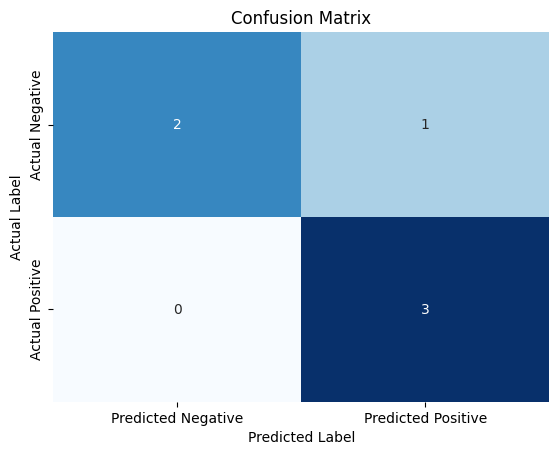

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
actual_labels = [1, 0, 1, 0, 1, 0]
predicted_labels = [1, 0, 1, 0, 1, 1]

# Create a confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#### Precision - Recall Curve

The Precision-Recall (PR) curve is a graphical representation of a classification model's performance across various thresholds. It shows the trade-off between precision and recall at different classification thresholds.

Here's a step-by-step explanation of the Precision-Recall curve:

1. *Threshold Variation*:In a binary classification problem, the model assigns a probability or a score to each instance, and a threshold is applied to convert these scores into class predictions (positive or negative).
By varying the threshold, you can observe how precision and recall change.
Precision and Recall Calculation:

2. For each threshold, calculate precision and recall based on the resulting predictions.
3. *Plotting the Curve*: Plot precision against recall for each threshold, creating a curve that illustrates the trade-off between the two metrics.

4. *Area Under the Curve (AUC-PR)*:The area under the Precision-Recall curve (AUC-PR) summarizes the overall performance of the model across different thresholds. A higher AUC-PR indicates better performance.

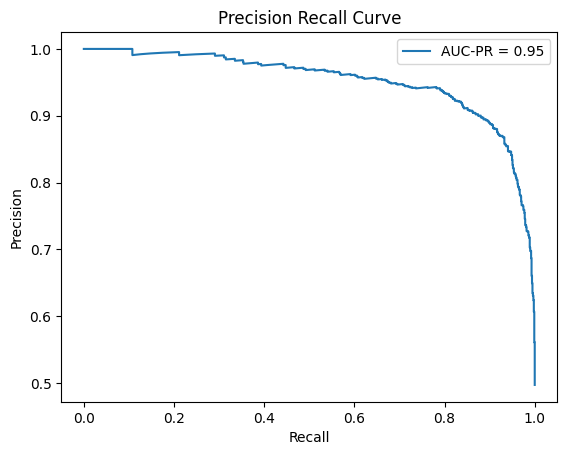

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, threshold = precision_recall_curve(y_test, y_probs)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

#### Imbalanced Dataset

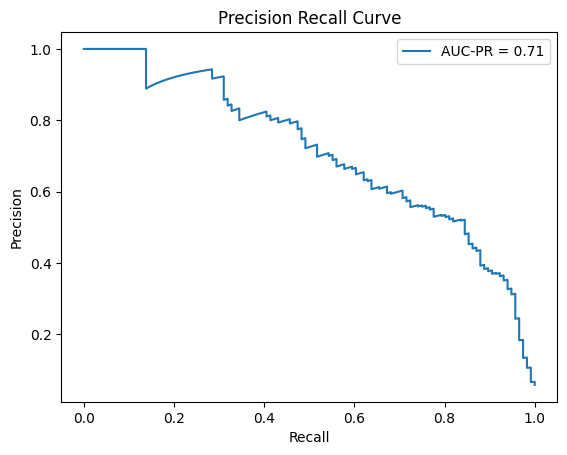

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, threshold = precision_recall_curve(y_test, y_probs)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

#### ROC - Receiver's Operating Characteristics (ROC)

The Receiver Operating Characteristic (ROC) curve is a graphical representation of a binary classification model's performance across various classification thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold values.

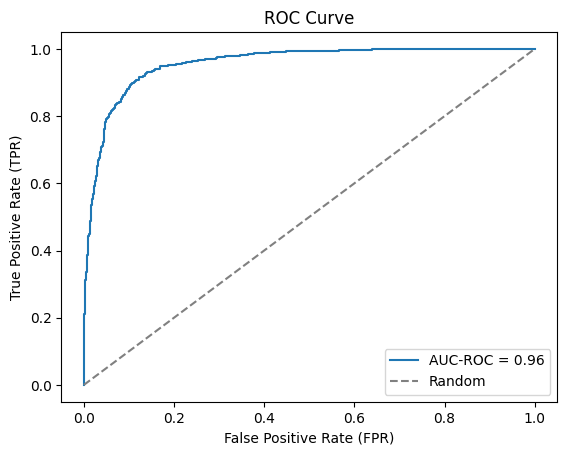

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_probs)

auc_roc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### AUC from scratch

In [9]:
def auc_from_scratch(fpr, tpr):
    """
    Calculate AUC from scratch using trapezoidal rule.

    Parameters:
    - fpr (list): List of false positive rates.
    - tpr (list): List of true positive rates.

    Returns:
    - float: Area Under the Curve (AUC)

    """

    auc_value = 0.0

    # Sort the points by ascending order of false positive rate
    points = sorted(zip(fpr, tpr), key=lambda x : x[0])

    for i in range(1, len(points)):
        # Calculate the area of the trapezoid formed by the current and previous points
        auc_value += 0.5 * (points[i][0] - points[i-1][0]) * (points[i][1] - points[i-1][1])

    return auc_value

# Example Usage:
fpr_example = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
tpr_example = [0.0, 0.4, 0.5, 0.8, 0.9, 1.0, 1.0]

# Calculate AUC using the function
auc_value_example = auc_from_scratch(fpr_example, tpr_example)

print(f"AUC from scratch: {auc_value_example:.4f}")

[(0.0, 0.0), (0.1, 0.4), (0.2, 0.5), (0.4, 0.8), (0.6, 0.9), (0.8, 1.0), (1.0, 1.0)]
0.1
0.0
AUC from scratch: 0.0750
